bnds = (,(0,x))

We will here work with a benchmark model of insurance policies, Mossin's model.

We are dealing with an agent wanting to get an insurance. 

The agent holds assets **y** and may suffer a monetary loss **x**.
For now we assume that the loss is incurred with probability **p**.

Utility of assets is given by $u(\cdot)$.
If the agent is not insured, expected value is 
$$
\begin{aligned}
V_{0}=pu(y-x)+(1-p)(y)
\end{aligned}
$$

The agent may however obtain an insurance contract to mitigate a loss.

The contract consists of a coverage amount **q** and a premium $\pi$.

The coverage cannot exceed the loss so $q\in[0,x]$ and $\pi$
must be paid irrespective of whether a loss was incurred.

To not go broke, the insurance company must require higher premium for
better coverage.
It therefore implements a premium policy 
$$
\begin{aligned}
\pi(p,q)=pq
\end{aligned}
$$
An insured agent will thus have expected utility 
$$
\begin{aligned}
V(q;\pi)=pu(y-x+q-\pi(p,q))+(1-p)u(y-\pi(p,q))$
\end{aligned}
$$
To solve the model numerically, we let $u$ be given by the function 
$$
\begin{aligned}
u(z)=\frac{z^{1+\vartheta}}{1+\vartheta}
\end{aligned}
$$
And use the following parameterization:

$$
\begin{aligned}
y=1,\thinspace\thinspace p=0.2,\thinspace\thinspace\vartheta=-2
\end{aligned}
$$

In [145]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

# standard imports
import numpy as np
from scipy import optimize
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
def u(z,vartheta):
    return (z)**(1+vartheta)/(1+vartheta)

In [147]:
def prem(p,q):
    return p*q

In [148]:
def V(x,q,p,y):
    return p*u(y-x+q-prem(p,q),vartheta) + (1-p)*u(y-prem(p,q),vartheta)

In [149]:
#Parameters
y = 1
p = 0.2
vartheta = -2
N = 100

**Question 1**

 Construct a function that takes $(x,y,p)$ as arguments and returns the agents' optimal insurance coverage: 
\begin{align}
q^{\star}=\textrm{argmax}_{q\in[0,x]}V(q;\pi)
\end{align}

Calculate and plot $q^{\star}$ for **x** in the range $[0.01,0.9]$.

What does the graph suggest about the general solution to the agent's problem?

In [150]:
result = np.zeros(N)
xs = np.linspace(0.01,0.9,N)

def q_star(x,y,p):
    objective = lambda q: -V(x,q,p,y)
    res = optimize.minimize_scalar(objective,bounds=(0,x)\
                                   ,method='bounded')
    return res.x

# loop
result = [q_star(xs[i],y,p) for i in range(N)]
pi_1 = xs*result #needed for graph in Q2

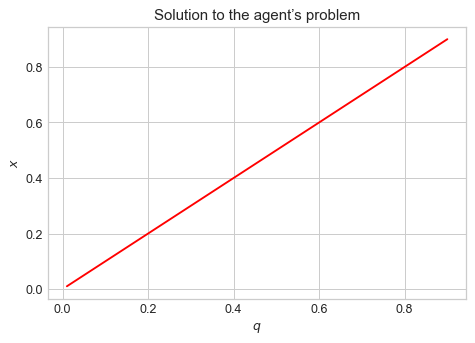

In [151]:
fig = plt.figure(dpi=90) # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)
ax.plot(result,xs,color='red')
ax.set_xlabel('$q$')
ax.set_ylabel('$x$')
ax.set_title('Solution to the agent’s problem')
ax.grid(True)

Q2

In [152]:
x = 0.6
pi_guess = 0.1

# empty grid for q's
qs = np.linspace(0.01, 0.6, N)

# grid to put the pi's in
pi_s = np.zeros(N) 

In [153]:
def v_0(x,q,p,y):
    return p*u(y-x,vartheta) + (1-p)*u(y,vartheta)

In [154]:
def V_opt(x,q,p,y,pi):
    return (p*u(y-x+q-pi,vartheta) + (1-p)*u(y-pi,vartheta)) - v_0(x,q,p,y)

In [155]:
def opt_pi(x,q,p,y):
    objective_pi = lambda pi: -V_opt(x,q,p,y,pi)
    res_pi = optimize.root(objective_pi,pi_guess,method='hybr')
    return res_pi.x

# loop
pi_s = [opt_pi(x,qs[i],p,y) for i in range(N)]

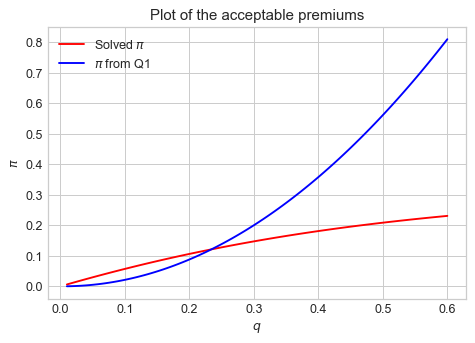

In [156]:
fig = plt.figure(dpi=90) # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)
ax.plot(qs,pi_s,color='red',label='Solved $\pi$')
ax.plot(qs,pi_1,color='blue',label='$\pi$ from Q1')
ax.set_xlabel('$q$')
ax.set_ylabel('$\pi$')
ax.set_title('Plot of the acceptable premiums')
ax.grid(True)
ax.legend();

Q3

We now consider a modification to the setup where the loss x is drawn from a beta distribution and the coverage q is a fraction of x.

In [199]:
def u(z,vartheta):
    return (z)**(1+vartheta)/(1+vartheta)

In [200]:
def V_3(gamma,pi):
    return u(y-(1-gamma)*x-pi,vartheta)*f_x

In [216]:
N = 10000
y = 1
p = 0.2
vartheta = -2
np.random.seed(2022)
def MC(gamma,pi,y,p,N):
    x = np.random.beta(2,7,size=10000)  #draws 10.000 number of x from a beta distribution
    f_x = beta.pdf(x,2,7)
    #x = xs.rvs(size=N)
    return np.mean(V_3(gamma,pi)) # apply g to X

In [198]:
MC(gamma=0.9,pi=0.2,y,p,N))

SyntaxError: positional argument follows keyword argument (4243690423.py, line 1)